In [1]:
import numpy as np
import matplotlib.pylab as plt
import mesa_reader as mr
import mkipp
%matplotlib inline

# Asymptotic-giant-branch (AGB) stars
So far, we have followed the evolution of a $1\,\mathrm{M}_\odot$ and $5\,\mathrm{M}_\odot$ star up to the end of core-helium burning. We will continue our discussion now beyond this point and start with the evolution of the $5\,\mathrm{M}_\odot$ model. To this end, you will find the inlist `inlist_agb` and you can run it on your computer. This will take a relatively long time and we suggest that you only run this model at home and not during the lab. Also, you will have to stop the computation at some point by hand after a few thermal pulses (i.e. press Ctrl-C in your terminal). You can download the MESA output [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/5M_agb.tar.gz). For the $1\,\mathrm{M}_\odot$ model, use the inlist `inlist_agb_to_wd`. You can either start the run now or download the output of this run [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/1M_agb_to_wd.tar.gz) and run the model at home.

We start by studying the evolution of density and temperature in the core of the $5\,\mathrm{M}_\odot$ star. The black dashed curve is from the previous evolution from the ZAMS through core helium burning and the blue part is of interest in this lab. The gray region again indicates electron degeneracy.

Text(0,0.5,'$\\log\\,T_\\mathrm{c}/\\mathrm{K}$')

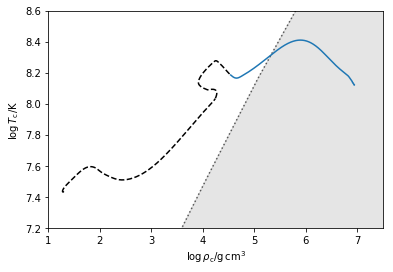

In [2]:
log_5M_to_che = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_to-core-he-ignition/LOGS_5M_to_core_he_ignition')
log_5M_che = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/5M_core-helium-burning/LOGS_5M_core_he_burning')
log_5M = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/LOGS_5M_agb')

logRho_deg, logT_deg = np.loadtxt('/Users/gaiafabj/Desktop/stellar_cookbook/09.hydrogen-shell-burning/psi4.data', unpack=True)
plt.plot(logRho_deg, logT_deg, 'k:', alpha=0.6)
plt.fill_between(logRho_deg, logT_deg, color='k', alpha=0.1)

plt.plot(log_5M_to_che.history.log_center_Rho, log_5M_to_che.history.log_center_T, 'k--')
plt.plot(log_5M_che.history.log_center_Rho, log_5M_che.history.log_center_T, 'k--')
plt.plot(log_5M.history.log_center_Rho, log_5M.history.log_center_T)

plt.xlim(1.0, 7.5)
plt.ylim(7.2, 8.6)

plt.xlabel(r'$\log\,\rho_\mathrm{c}/\mathrm{g}\,\mathrm{cm}^{3}$')
plt.ylabel(r'$\log\,T_\mathrm{c}/\mathrm{K}$')

We have seen in the last lab that the star has developed an inert carbon-oxygen core by core-helium burning and this core becomes degenerate during the AGB evolution. In fact, this star won't be able to ignite carbon (more massive stars, that we will study later, will be able to also ignite carbon in the core).

In the HR diagram, the star ended its blue loop and asymptotically approaches the RGB again, hence the name **asymptotic-giant-branch (AGB) star** for this evolutionary phase.

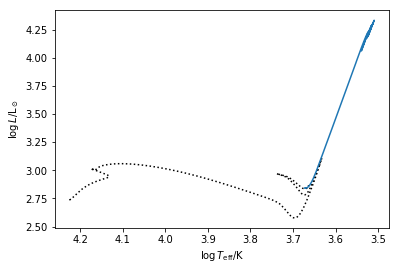

In [3]:
plt.plot(log_5M_to_che.history.log_Teff, log_5M_to_che.history.log_L, 'k:')
plt.plot(log_5M_che.history.log_Teff, log_5M_che.history.log_L, 'k:')
plt.plot(log_5M.history.log_Teff, log_5M.history.log_L)

plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')

plt.gca().invert_xaxis()

## Interior structure of AGB stars and second dredge-up

A look into its interior reveals the general structure of AGB stars. As usual, the blue dotted lines indicates the helium core and the red dotted curve the carbon-oxygen core. Note that we have zoomed into the central $2\,\mathrm{M}_\odot$ of the star to highlight certain features.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/LOGS_5M_agb ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/LOGS_5M_agb']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones


Text(36.625,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

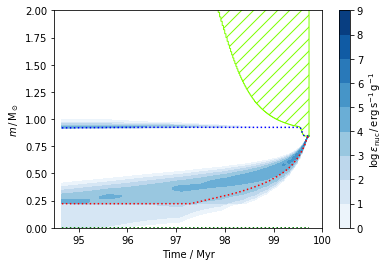

In [4]:
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/5M/LOGS_5M_agb'],
                                            xaxis = 'star_age',
                                            decorate_plot = False), xlims=[94.5, 100])

# add colorbar and label
cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)
cbar.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

plt.ylim(0,2)

# xy labels
plt.xlabel('Time / Myr')
plt.ylabel(r'$m\,/\,\mathrm{M}_\odot$')

#### Problem 1:
Describe the interior structure and evolution of an AGB star. Draw a schematic picture of the interior of an AGB star and pay particular attention to the core, the position of burning shells, the region between such shells and the envelope.

During the evolution, the convective envelope penetrates into the helium-rich core after the hydrogen shell suspended burning (while the shell source is active, the shell is hot and energy can be transported by radiation; once the shell is cool enough, the opacity increases and the convective envelope extends beyond this shell). This is called the **second dredge-up** and has quite significant consequences. Firstly, helium-rich material is dredged up to the surface and, secondly, the helium core mass is reduced. The latter affects the masses of the white-dwarf remnants and also the range of initial masses of stars that leave white dwarfs as their remnants (more on compact remnants of stars in a later lecture/lab).

#### Problem 2:
Which elements are dredged up? Visualise your result by plotting the production/destruction factor of the surface mass fractions of these chemical elements over time (i.e. ratio of current and initial abundance of the AGB phase). What happens to helium, carbon, nitrogen and oxygen, and why? *Hint:* Be reminded that surface abundances are available in the history output as `surface_XX` where `XX` can be `he4`, `c12` etc. Think about the CNO cycle. 

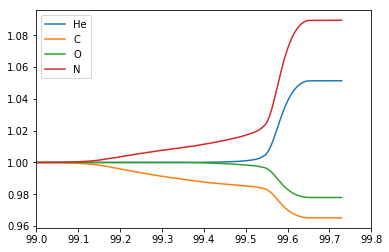

In [5]:
# Your solution here
log_he4 = log_5M.history.surface_he4
he4 = log_he4/log_5M.history.surface_he4[0]

log_c = log_5M.history.surface_c12
c12 = log_c/log_5M.history.surface_c12[0]

time = log_5M.history.star_age/1e6


plt.plot(time,he4,label='He')
plt.plot(time,c12,label='C')
plt.plot(time,log_5M.history.surface_o16/log_5M.history.surface_o16[0],label='O')
plt.plot(time,log_5M.history.surface_n14/log_5M.history.surface_n14[0],label='N')
plt.xlim(99,99.8)
plt.legend()

The second dredge-up only occurs in sufficiently massive stars ($\gtrsim 4\,\mathrm{M}_\odot$) where the hydrogen-burning shell indeed switches off such that the convective envelope can penetrate into regions that were processed by hydrogen burning.  

## Thermal pulses

In the above Kippenhahn diagram, you can see how the helium-burning shell becomes thinner with time until it almost overlaps with the hydrogen-burning shell. Whenever shells become too thin, they can become thermally unstable. The associated instability is called the **thin shell instability** [derivation on black board].

This instability is very similar to the ignition of nuclear burning under degenerate conditions but here it occurs in a thin helium shell under ideal-gas conditions. Whenever the thickness $l$ of the helium shell is so small that
\begin{align}
4\frac{l}{r} \leq \chi_\rho, \quad \chi_\rho = \left( \frac{\partial \log P }{\partial \log \rho} \right)_T,
\end{align}
a thermonuclear runaway sets in. The helium-burning luminosity increases exponentially until the shell is in the stable regime again and the usual stellar thermostat limits nuclear burning.

These thermal pulses can be nicely followed with MESA but it takes quite some computing time to evolve stellar models through this evolutionary phase. We have aborted the computation after 4 thermal pulses.

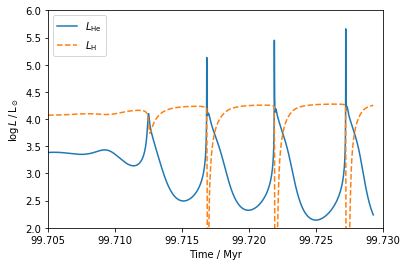

In [6]:
plt.plot(log_5M.history.star_age/1e6, log_5M.history.log_LHe, label='$L_\mathrm{He}$')
plt.plot(log_5M.history.star_age/1e6, log_5M.history.log_LH, ls='--', label='$L_\mathrm{H}$')

plt.xlim(99.705, 99.730)
plt.ylim(2,6.0)

plt.xlabel('Time / Myr')
plt.ylabel(r'$\log\,L\,/\,\mathrm{L}_\odot$')

plt.legend()

#### Problem 3:
Initially, both the hydrogen- and helium-shells are active. Whenever the helium shell becomes thermally unstable, hydrogen-burning switches off. Can you imagine why? *Hint:* Recall the interior structure of an AGB star and the position of the two shells. Enhanced burning leads to an expansion of the helium shell.

A nice illustration of what happens in AGB stars during thermal pulses is by Onno Pols. A similar diagram can also be found in Herwig 2005, ARA&A. 

<img src="tp-agb-illustration-pols.png" alt="Thermal pulses in AGB stars" width="700"/>

During shell burning, both the carbon-oxygen and the helium core grow as shell-helium and shell-hydrogen burning add carbon, oxygen and helium to the layers beneath them. When the helium shell becomes unstable, an intershell convection zone develops that might mix helium-burning ashes (i.e. carbon and oxygen) up to the hydrogen-burning shell. When the hydrogen shell switches off because of the helium flashes, the convective envelope might eat into material enriched by the helium-burning shell and could potentially dredge up this material to the surface. The latter is then called the **third dredge-up**. The third dredge-up can in principle happen after each helium-shell flash. Our $5\,\mathrm{M}_\odot$ does not show a third dredge-up (yet), but feel free to continue the evolution through more helium-shell flashes until you see helium-burning products at the surface. Note however that the hydrogen-burning shell will quickly convert the dredged-up carbon and oxygen into nitrogen. The following figure from Stancliffe et al. 2004, MNRAS, nicely demonstrates the third dredge up in a $3\,\mathrm{M}_\odot$ star. In their model, the third dredge-up only occurs after the 7th thermal pulse.

<img src="stancliffe-2004-3M-LHe.png" alt="Helium-burning luminosity" width="500"/>
<img src="stancliffe-2004-3M-CNO.png" alt="Thermal pulses in AGB stars" width="500"/>

In stars with **hot-bottom burning** (as in our model studied here), the dredged-up carbon and oxygen are converted into nitrogen during the interpuls phases. Hot-bottom burning is thought to only occur in stars with $\gtrsim 4\text{--}5\,\mathrm{M}_\odot$.

## Nucleosynthesis in AGB stars and the s-process

As we will see below, AGB stars have strong winds. These erode the envelopes and release its mass back to the interstellar medium. In fact, it is thought that most of the carbon and nitrogen in the Universe are produced by such TP-AGB stars (carbon by those AGB stars without hot-bottom burning and nitrogen in those where the CNO cycle converts all carbon to nitrogen). But also a significant fraction of the lithium in the Universe is thought to have been produced via the pp-chain in hydrogen burning shells of AGB stars. 

There is yet another, very important process occurring in TP-AGB stars. In fact, AGB stars have produced about half of all chemical elements heavier than iron by this process. When carbon is mixed close to the hydrogen-burning shell by the ICZ driven by helium-shell flashes, $^{13}$C might be produced if some protons can be mixed into the helium-burning ashes: $^{12}\mathrm{C}+\mathrm{p}\rightarrow ^{13}\mathrm{C} + \gamma + \mathrm{e}^+ + \nu_\mathrm{e}$. This $^{13}$C further reacts with helium nuclei and releases neutrons: $^{13}\mathrm{C} + \alpha \rightarrow ^{16}\mathrm{O} + \mathrm{n}$. Neutrons have the nice property that they can be captured easily by other nuclei and thereby produce truly heavy atoms. The neutron exposure in AGB stars is rather small and this process is therefore called slow neutron capture or simply **s-process**. In the merger of neutron stars, the neutron density is much higher such that many neutrons can be captured over a very short timescale and this process is thus called rapid neutron capture or **r-process**. Another source of neutrons in massive AGB stars is $^{22}\mathrm{Ne}+\alpha \rightarrow ^{25}\mathrm{Mg} + \mathrm{n}$. We won't be able to go into more details of this very interesting nucleosynthetic process, but please feel free to look it up in your favourite stellar evolution text-book.

Typical elements produced by the s-process are barium (Ba) and lead (Pb). But also the radioactive isotope $^{99}\mathrm{Tc}$ technetium is produced by the s-process. This isotope has a decay timescale of $2\times10^5\,\mathrm{yr}$ and can not be found on Earth. However, it has been observed in the atmospheres of AGB stars and is therefore considered the smoking gun for the s-process in such stars.

## Wind mass-loss, termination of AGB evolution and formation of white dwarfs

Already on the RGB, stars have strong winds and lose a significant fraction of their mass. From observations of RGB stars and simple scaling arguments, Reimers 1975 and 1977 found
\begin{align}
\dot{M}_\mathrm{R} = 4\times 10^{-13} \eta_\mathrm{R} \frac{L}{\mathrm{L}_\odot} \frac{R}{\mathrm{R}_\odot} \frac{\mathrm{M}_\odot}{M}\,\mathrm{M}_\odot\,\mathrm{yr}^{-1},
\end{align}
where $\eta_\mathrm{R}$ is a calibration factor of order unity (called `Reimers_scaling_factor` in MESA).

For AGB stars, Bloecker 1995 finds from observations
\begin{align}
\dot{M}_\mathrm{B} = 4.83 \times 10^{-9} \eta_\mathrm{B} \left(\frac{\mathrm{M}_\odot}{M}\right)^{2.1} \left(\frac{L}{\mathrm{L}_\odot}\right)^{2.7} \dot{M}_\mathrm{R},
\end{align}
again with a scaling factor $\eta_\mathrm{B}$ of order unity (called `Blocker_scaling_factor` in Mesa).

The exact physical mechanisms leading to these winds are still under investigation, but it is thought to be a combination of *pulsations* and *radiation pressure*, i.e. photons pushing gas out of the gravitational potential. For AGB stars, pulsations will lead to cooling of the photosphere such that molecules and dust particles form. These particles have a much larger cross section for interaction with photons. Radiation pressure on these particles may then be mainly responsible for driving the very strong winds of AGB stars.

To further motivate the fact that radiation pressure must be important in RGB and AGB stars, and that this likely contributes to the winds, let's consider the Eddington luminosity,
\begin{align}
L_\mathrm{edd}  &= \frac{4\pi c G M}{\kappa} \\
                &=3 \times 10^4 \left(\frac{M}{\mathrm{M}_\odot}\right) \mathrm{L}_\odot.
\end{align}
The Eddington luminosity is that limit beyond which photon pressure overcomes gravity and stars can not longer be in hydrostatic equilibrium. In the last equation, electron-scattering opacity for a pure hydrogen gas is assumed. The true opacity in the atmospheres of RGB and AGB stars is higher than that from electron scattering. But already for electron scattering only, the AGB stars reach luminosities of about 10% of the Eddington limit, as you can easily verify in the HR diagrams of the $5\,\mathrm{M}_\odot$ model above and the $1\,\mathrm{M}_\odot$ model below.

#### Student-report part 1:
Imagine a fraction $f$ of the total stellar luminosity is used to lift some mass $\Delta M$ out of the gravitational potential of a star. By equating the photon energy absorbed by $\Delta M$ over a time period $\Delta t$ to the energy needed to bring $\Delta M$ to infinity, compute the resulting mass-loss rate $\dot{M}=\Delta M/\Delta t$. How does this mass-loss rate compare to Reimers' wind mass-loss law of RGB stars?

#Your solution here
fL = -delta U/delta t

To illustrate what happens to AGB stars when they lose their envelope, we consider the evolution of the $1\,\mathrm{M}_\odot$ model through the AGB phase in the HR diagram:

(-1, 3.5)

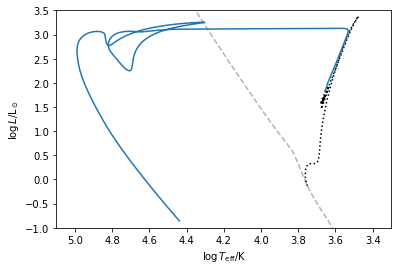

In [8]:
# ZAMS from previous lab
logL_zams, Teff_zams, Rho_c_zams, T7_c_zams = np.loadtxt('../06.zero-age_main-sequence/zams-properties.txt', usecols=(1,4,5,6), unpack=True)
logTeff_zams = np.log10(Teff_zams)
plt.plot(logTeff_zams, logL_zams, 'k--', alpha=0.3)

log_1M_to_che = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_to-core-he-ignition/LOGS_1M_to_core_he_ignition')
log_1M_che = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_core-helium-burning/LOGS_1M_core_he_burning')
log_1M = mr.MesaLogDir('/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_agb_to_wd/LOGS_1M_agb_to_wd')

plt.plot(log_1M_to_che.history.log_Teff, log_1M_to_che.history.log_L, 'k:')
plt.plot(log_1M_che.history.log_Teff, log_1M_che.history.log_L, 'k:')
plt.plot(log_1M.history.log_Teff, log_1M.history.log_L)

plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')

plt.xlim(5.1, 3.3)
plt.ylim(-1, 3.5)

The star climbs up the AGB and as soon as it has lost almost all of its envelope, the hot core regions are exposed. The star moves across the HR diagram to hot temperatures (in about $10^4\,\mathrm{yr}$). As soon as the star reaches temperatures of about $30000\,\mathrm{K}$, hydrogen is ionized and a planetary nebula can be observed. When hydrogen- and helium-shell burning extinguish (at $\log\,T_\mathrm{eff}\,/\,\mathrm{K}\approx 5.0$), the remnant starts to cool down and finally becomes a carbon-oxygen white dwarf.

Just before both shell sources extinguish, there is a helium shell flash. Such late flashes are sometimes observed in models, albeit more often as one last thermal pulse in more massive thermally-pulsing AGB stars. Depending on the strength of the last pulse, the star may move all the way back to the AGB and is sometimes called a born-again AGB star. Try to locate the helium flash in the Kippenhahn diagram below.

/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_agb_to_wd/LOGS_1M_agb_to_wd ['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_agb_to_wd/LOGS_1M_agb_to_wd']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones


Text(27.125,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

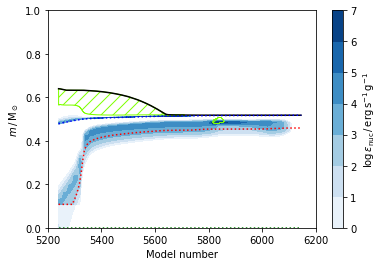

In [9]:
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['/Users/gaiafabj/Desktop/stellar_cookbook/mesa-models/1M/1M_agb_to_wd/LOGS_1M_agb_to_wd'],
                                            decorate_plot = False), xlims=[5200,6200])

# add colorbar and label
cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)
cbar.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

plt.ylim(0,1)

# xy labels
plt.xlabel('Model number')
plt.ylabel(r'$m\,/\,\mathrm{M}_\odot$')

#### Student-report part 2:
Plot the abundance profile of the last available model. What is the rough composition of the forming white dwarf left behind by a $1\,\mathrm{M}_\odot$ star? 

In [40]:
print(log_1M.model_numbers)

[5240 5241 5260 5280 5300 5320 5340 5360 5380 5400 5420 5440 5460 5480
 5500 5520 5540 5560 5580 5600 5620 5640 5660 5680 5700 5720 5740 5760
 5780 5800 5820 5840 5860 5880 5900 5920 5940 5960 5980 6000 6020 6040
 6060 6080 6100 6120 6140 6146]


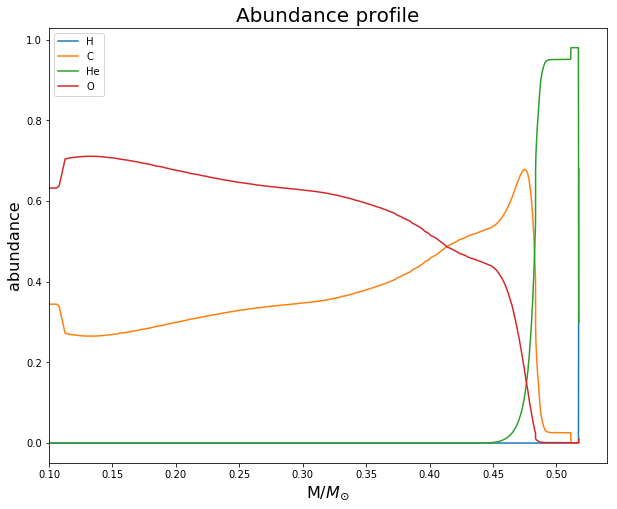

In [47]:
plt.figure(figsize=(10,8))
plt.plot(log_1M.profile_data(6146).mass,log_1M.profile_data(6146).h1,label='H')
plt.plot(log_1M.profile_data(6146).mass,log_1M.profile_data(6146).c12,label='C')
plt.plot(log_1M.profile_data(6146).mass,log_1M.profile_data(6146).he4,label='He')
plt.plot(log_1M.profile_data(6146).mass,log_1M.profile_data(6146).o16,label='O')
plt.xlim(0.1,0.54)
plt.ylabel('abundance',fontsize=16)
plt.xlabel(r'M/$M_{\odot}$',fontsize=16)
plt.title('Abundance profile',fontsize=20)
plt.legend()

#### 